In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Đọc file dữ liệu chứng khoán BIDV và chia tập train test theo tỉ lệ 9:1
df = pd.read_csv('BIDV.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Chia dữ liệu thành 2 tập train và test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA phù hợp nhất bằng auto_arima 
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit mô hình
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18711.109, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18713.228, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18713.572, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18713.506, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18711.579, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18714.988, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18714.893, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18718.164, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18717.958, Time=0.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18715.339, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18716.719, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18716.612, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18714.933, Time=1.50 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=18709.294, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [4]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [5]:
# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo một mảng gồm 90 số nguyên liên tiếp bắt đầu từ last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán giá đóng cho 90 ngày tiếp theo
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# In ra giá đóng đã được dự đoán trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[37354.53497228 37379.96117935 37344.38515278 37376.15908818
 37359.97079228 37355.28834347 37377.97695713 37346.78707958
 37374.26734074 37360.66573384 37355.98931177 37376.21792878
 37348.8850496  37372.63952852 37361.23419944 37356.63883122
 37374.65950447 37350.71677016 37371.23973866 37361.69685727
 37357.23847102 37373.27964    37352.31536866 37370.03683807
 37362.07120907 37357.79024409 37372.05859415 37353.70993598
 37369.00385011 37362.37205418 37358.29646906 37370.97870582
 37354.92600711 37368.11741099 37362.61188774 37358.75965996
 37370.02419006 37355.98598605 37367.35729584 37362.80124227
 37359.1824388  37369.18095161 37356.90952129 37366.70600577
 37362.94898045 37359.56746715 37368.43641511 37357.7138373
 37366.14840817 37363.06254577 37359.91739322 37367.77937059
 37358.41402724 37365.67142356 37363.14817708 37360.23481178
 37367.19983333 37359.02331105 37365.26375304 37363.21109191
 37360.52223432 37366.68891679 37359.55

In [6]:
# 6. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 11133.307724785043


In [7]:
# 7. Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 20.43025660426968


In [8]:
# 8. Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing MAE: 10093.963100242887


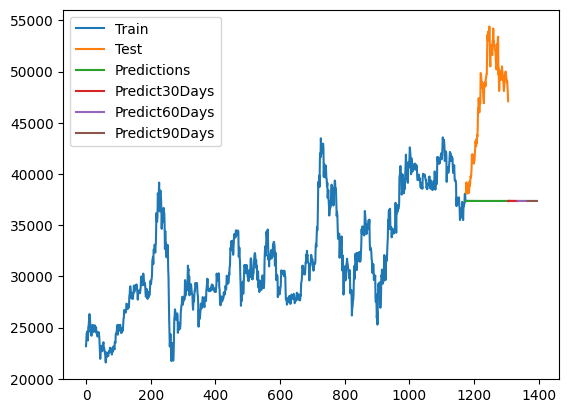

In [9]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data[0:30],y_next_90_days[0:30])
plt.plot(last_data[30:60],y_next_90_days[30:60])
plt.plot(last_data[60:90],y_next_90_days[60:90])
plt.legend(['Train', 'Test', 'Predictions','Predict30Days', 'Predict60Days', 'Predict90Days'])
plt.show()

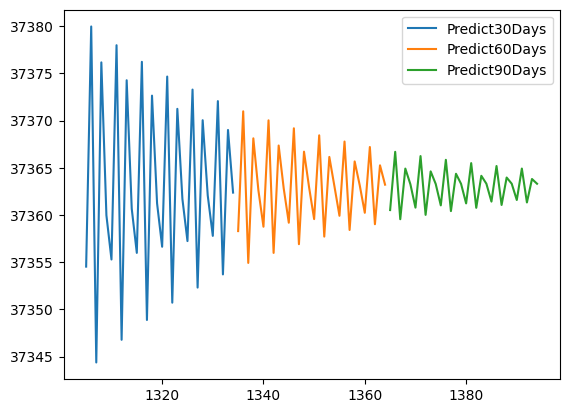

In [10]:
plt.plot(last_data[0:30],y_next_90_days[0:30])
plt.plot(last_data[30:60],y_next_90_days[30:60])
plt.plot(last_data[60:90],y_next_90_days[60:90])
plt.legend(['Predict30Days', 'Predict60Days', 'Predict90Days'])
plt.show()